In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("3.concertriccir2.csv",header=None)

In [4]:
data.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [5]:
data.shape

(500, 3)

In [6]:
data[2].value_counts()

0.0    250
1.0    250
Name: 2, dtype: int64

Balanced data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [8]:
data[[0,1]]

,0,1
0,0.700335,-0.247068
1,-3.950019,2.740080
2,0.150222,-2.157638
3,-1.672050,-0.941519
4,2.560483,-1.846577
...,...,...
495,2.177895,2.984489
496,1.778905,2.869205
497,0.894180,3.069959
498,0.849439,3.875435


C:\Users\kusumitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

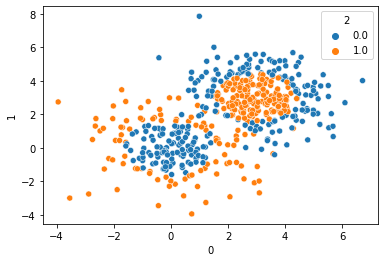

In [9]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(400, 2) (400,)
(100, 2) (100,)


In [11]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Rescaling X test and X_train

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)
pd.DataFrame(x_trainf).head()

,0,1
0,-0.211578,0.121124
1,-1.227285,-0.629904
2,0.950315,1.161029
3,1.091914,0.482020
4,0.867367,0.111556


# Sigmoid Activation Fn sgd optimizer

In [40]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))

model.add(Dense(4,activation="sigmoid"))

model.add(Dense(2,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
 dense_7 (Dense)             (None, 4)                 16        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


#We are using Stochastic Gradient Descent
And output variable is binary, so we use Binary_cross entropy loss fn.

In [42]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [43]:
history=model.fit(x_trainf,y_train,batch_size=100,epochs=20,validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 0s 48ms/step - loss: 0.7330 - accuracy: 0.5125 - val_loss: 0.7953 - val_accuracy: 0.4125
Epoch 2/20
4/4 [==============================] - 0s 10ms/step - loss: 0.7317 - accuracy: 0.5125 - val_loss: 0.7937 - val_accuracy: 0.4125
Epoch 3/20
4/4 [==============================] - 0s 13ms/step - loss: 0.7308 - accuracy: 0.5125 - val_loss: 0.7919 - val_accuracy: 0.4125
Epoch 4/20
4/4 [==============================] - 0s 12ms/step - loss: 0.7298 - accuracy: 0.5125 - val_loss: 0.7902 - val_accuracy: 0.4125
Epoch 5/20
4/4 [==============================] - 0s 11ms/step - loss: 0.7288 - accuracy: 0.5125 - val_loss: 0.7881 - val_accuracy: 0.4125
Epoch 6/20
4/4 [==============================] - 0s 12ms/step - loss: 0.7276 - accuracy: 0.5125 - val_loss: 0.7864 - val_accuracy: 0.4125
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 0.7267 - accuracy: 0.5125 - val_loss: 0.7846 - val_accuracy: 0.4125
Epoch 8/20
4/4 [===========

In [44]:
y_pred=model.predict(x_testf)

if y_pred is greater than 0.5 we make it 1 else 0

In [45]:
y_predf=np.where(y_pred>0.5,1,0)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.53

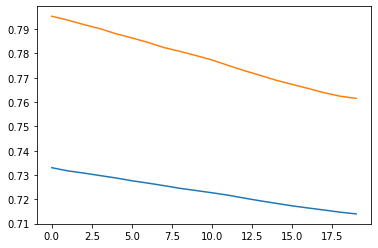

In [47]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [49]:
import mlxtend

In [50]:
from mlxtend.plotting import plot_decision_regions

C:\Users\kusumitha\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

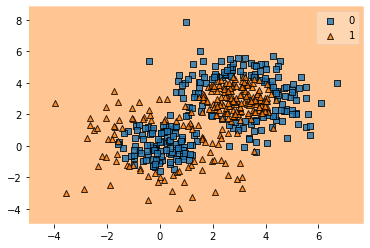

In [51]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

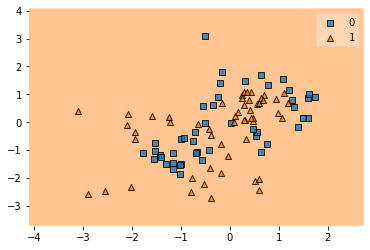

In [52]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Sigmoid Fn with optimizer adam

In [53]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))

model.add(Dense(3,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 9         
                                                                 
 dense_11 (Dense)            (None, 3)                 12        
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [66]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=40,validation_split=0.2)

Epoch 1/40
32/32 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5063 - val_loss: 0.6989 - val_accuracy: 0.4125
Epoch 2/40
32/32 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.4812 - val_loss: 0.6978 - val_accuracy: 0.4000
Epoch 3/40
32/32 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.4906 - val_loss: 0.6973 - val_accuracy: 0.4000
Epoch 4/40
32/32 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.4938 - val_loss: 0.6982 - val_accuracy: 0.4000
Epoch 5/40
32/32 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5063 - val_loss: 0.6977 - val_accuracy: 0.4000
Epoch 6/40
32/32 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.4812 - val_loss: 0.6986 - val_accuracy: 0.4125
Epoch 7/40
32/32 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.4781 - val_loss: 0.6987 - val_accuracy: 0.4125
Epoch 8/40
32/32 [==

In [67]:
y_pred=model.predict(x_testf)

In [68]:
y_predf=np.where(y_pred>0.5,1,0)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.56

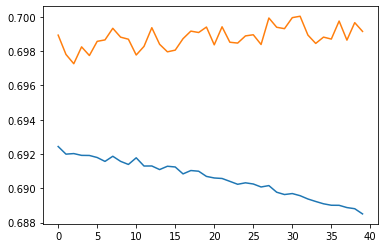

In [70]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

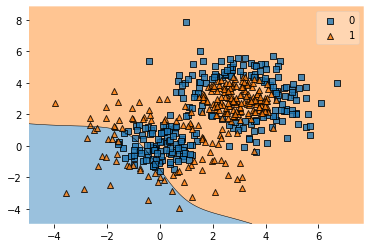

In [71]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

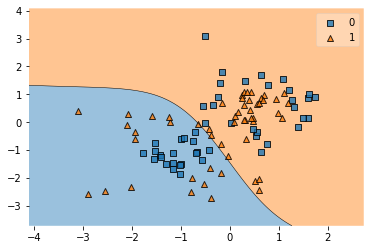

In [72]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Tanh Act Fn with sgd optimizer

In [73]:
model=Sequential()
model.add(Dense(3,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 3)                 9         
                                                                 
 dense_14 (Dense)            (None, 4)                 16        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [76]:
history=model.fit(x_trainf,y_train,batch_size=30,epochs=20,validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 1s 31ms/step - loss: 0.7026 - accuracy: 0.5938 - val_loss: 0.7372 - val_accuracy: 0.6000
Epoch 2/20
11/11 [==============================] - 0s 8ms/step - loss: 0.7009 - accuracy: 0.5906 - val_loss: 0.7362 - val_accuracy: 0.6125
Epoch 3/20
11/11 [==============================] - 0s 7ms/step - loss: 0.6992 - accuracy: 0.5906 - val_loss: 0.7353 - val_accuracy: 0.6125
Epoch 4/20
11/11 [==============================] - 0s 8ms/step - loss: 0.6978 - accuracy: 0.5906 - val_loss: 0.7346 - val_accuracy: 0.6125
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 0.6964 - accuracy: 0.5938 - val_loss: 0.7340 - val_accuracy: 0.6250
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.5969 - val_loss: 0.7332 - val_accuracy: 0.6250
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 0.6938 - accuracy: 0.6000 - val_loss: 0.7326 - val_accuracy: 0.6250
Epoch 8/20
11/11 [=

In [77]:
y_pred=model.predict(x_testf)

In [78]:
y_predf=np.where(y_pred>0.5,1,0)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.67

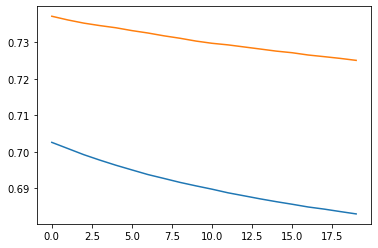

In [80]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

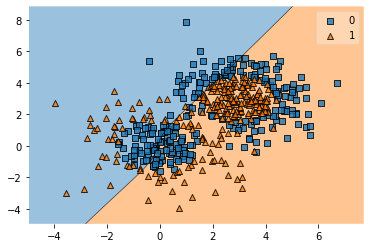

In [81]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

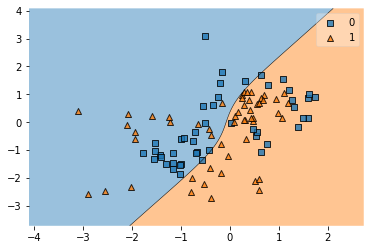

In [82]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Tanh Act Fn with adam optimizer

In [83]:
model=Sequential()
model.add(Dense(3,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 3)                 9         
                                                                 
 dense_17 (Dense)            (None, 4)                 16        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [86]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 1s 11ms/step - loss: 0.7643 - accuracy: 0.4125 - val_loss: 0.7048 - val_accuracy: 0.5125
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7419 - accuracy: 0.4094 - val_loss: 0.6961 - val_accuracy: 0.5500
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.7242 - accuracy: 0.4062 - val_loss: 0.6911 - val_accuracy: 0.5375
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7111 - accuracy: 0.4187 - val_loss: 0.6886 - val_accuracy: 0.5250
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7015 - accuracy: 0.4406 - val_loss: 0.6877 - val_accuracy: 0.5750
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5312 - val_loss: 0.6874 - val_accuracy: 0.6375
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5813 - val_loss: 0.6879 - val_accuracy: 0.4625
Epoch 8/20
32/32 [=

In [87]:
y_pred=model.predict(x_testf)

In [88]:
y_predf=np.where(y_pred>0.5,1,0)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.57

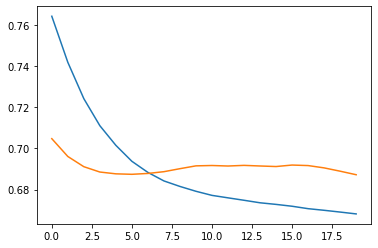

In [90]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

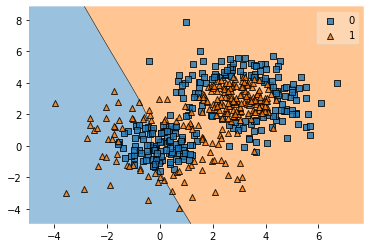

In [91]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

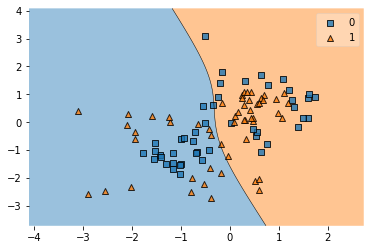

In [92]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Relu Act Fn with sgd optimizer

In [93]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=2))

model.add(Dense(2,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 3)                 9         
                                                                 
 dense_20 (Dense)            (None, 2)                 8         
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

In [96]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=30,validation_split=0.2)

Epoch 1/30
32/32 [==============================] - 1s 11ms/step - loss: 0.6954 - accuracy: 0.3969 - val_loss: 0.6857 - val_accuracy: 0.4500
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4062 - val_loss: 0.6863 - val_accuracy: 0.4625
Epoch 3/30
32/32 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.4125 - val_loss: 0.6870 - val_accuracy: 0.4625
Epoch 4/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.4281 - val_loss: 0.6876 - val_accuracy: 0.4625
Epoch 5/30
32/32 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.4344 - val_loss: 0.6882 - val_accuracy: 0.4500
Epoch 6/30
32/32 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.4500 - val_loss: 0.6887 - val_accuracy: 0.4500
Epoch 7/30
32/32 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.4531 - val_loss: 0.6891 - val_accuracy: 0.4500
Epoch 8/30
32/32 [=

In [97]:
y_pred=model.predict(x_testf)

In [98]:
y_predf=np.where(y_pred>0.5,1,0)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.51

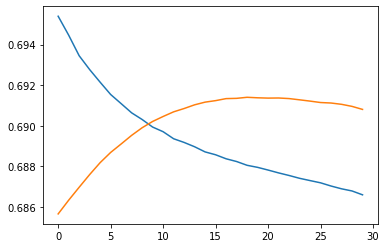

In [100]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

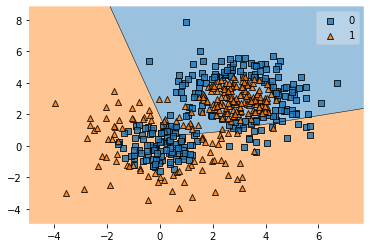

In [101]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

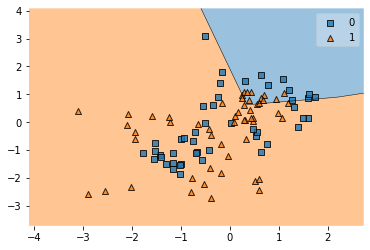

In [102]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Relu Act Fn with adam optimizer

In [103]:
model=Sequential()
model.add(Dense(3,activation="relu",input_dim=2))

model.add(Dense(4,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [104]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 3)                 9         
                                                                 
 dense_23 (Dense)            (None, 4)                 16        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [106]:
history=model.fit(x_trainf,y_train,batch_size=10,epochs=20,validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 1s 11ms/step - loss: 0.7828 - accuracy: 0.4875 - val_loss: 0.7631 - val_accuracy: 0.4375
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7422 - accuracy: 0.4781 - val_loss: 0.7315 - val_accuracy: 0.4375
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7170 - accuracy: 0.4437 - val_loss: 0.7171 - val_accuracy: 0.4125
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.7054 - accuracy: 0.4125 - val_loss: 0.7079 - val_accuracy: 0.4125
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.4062 - val_loss: 0.7034 - val_accuracy: 0.4125
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.3969 - val_loss: 0.7010 - val_accuracy: 0.4125
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.3875 - val_loss: 0.6992 - val_accuracy: 0.4125
Epoch 8/20
32/32 [=

In [107]:
y_pred=model.predict(x_testf)

In [108]:
y_predf=np.where(y_pred>0.5,1,0)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.55

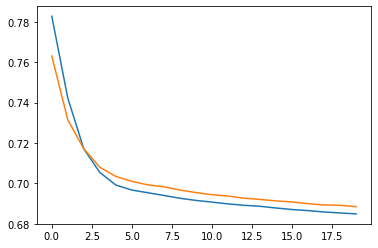

In [110]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<AxesSubplot:>

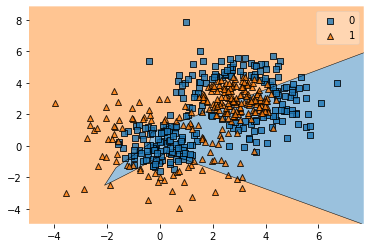

In [111]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

<AxesSubplot:>

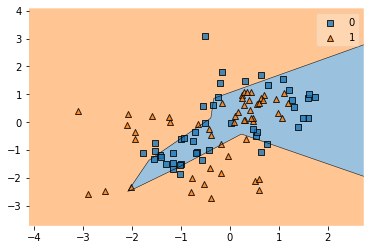

In [112]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

# Conclusion

### For this Dataset "concertirccirr" Tanh Activation Function with sgd optimizer is working well.